In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
import glob
import re
import csv
import numpy as np

In [20]:
output_files = glob.glob("CNN_output/*cnn*.txt")
print(output_files)


model_name = output_files[0].partition("_skin")[0]
csv_file_name = "Basic_CNN_metrics.csv"

hyper_params = [
    "ViT",
    "CNN",
    # "tokenizer",
    # "integrate_way",
    # "optimizer",
    # "batch_size",
    "epochs",
    "max_stop_count",
    "grad_norm_clip",
    "learning_rate",
    "scheduler",
    "weight_decay",
]

pattern_true = r"binary skin tone (\d+) true .*:\[(.*?)\]"
pattern_predict = r"binary skin tone (\d+) predicted .*:\[(.*?)\]"
# pattern_true = r"^skin tone (\d+) true .*:\[(.*?)\]"
# pattern_predict = r"^skin tone (\d+) predicted .*:\[(.*?)\]"

pattern_loss = r"validation loss\s*=\s*\[(.*?)\]"

header = [
    "Hyper Parameters",
]

metric_types = [
    "Accuracy",
    "Sensitivity",
    "Specificity",
    "Precision",
    "F1_Score",
    "AUC",
]


for i in range(1, 3):
    for metric in metric_types:
        header.append(f"Skin{i} {metric}")


# for i in range(1, 7):
#     for metric in metric_types:
#         header.append(f"Skin{i} {metric}")

print(header)
print(model_name)

with open(csv_file_name, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)

['CNN_output\\torchvision_cnn_skin_Adam_0.001_fixed.txt', 'CNN_output\\torchvision_cnn_skin_SGD_Momentum_0.001_CosineAnnealingLR.txt', 'CNN_output\\torchvision_cnn_skin_SGD_Momentum_0.001_CosineAnnealingLR_ds.txt', 'CNN_output\\torchvision_cnn_skin_SGD_Momentum_0.001_fixed.txt']
['Hyper Parameters', 'Skin1 Accuracy', 'Skin1 Sensitivity', 'Skin1 Specificity', 'Skin1 Precision', 'Skin1 F1_Score', 'Skin1 AUC', 'Skin2 Accuracy', 'Skin2 Sensitivity', 'Skin2 Specificity', 'Skin2 Precision', 'Skin2 F1_Score', 'Skin2 AUC']
CNN_output\torchvision_cnn


learning_rate = 0.001
weight_decay = 0.0001
scheduler = fixed
max_stop_count = 5
grad_norm_clip = 1
292


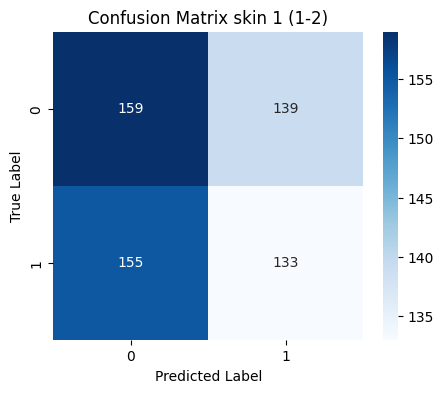

Accuracy: 0.4983
Sensitivity: 0.4618
Specificity: 0.5336
Precision: 0.4890
F1: 0.4750
AUC: 0.4977
38


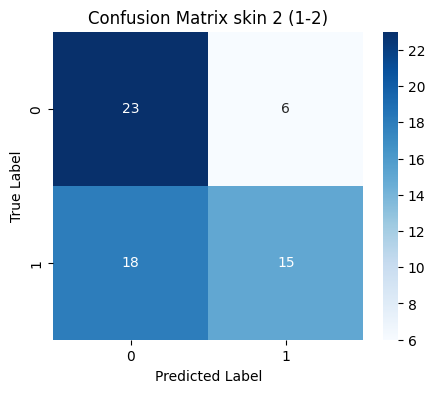

Accuracy: 0.6129
Sensitivity: 0.4545
Specificity: 0.7931
Precision: 0.7143
F1: 0.5556
AUC: 0.6238
['learning_rate = 0.001  weight_decay = 0.0001  scheduler = fixed  max_stop_count = 5  grad_norm_clip = 1  ', ' 0.4983', ' 0.4618', ' 0.5336', ' 0.4890', ' 0.4750', ' 0.4977', ' 0.6129', ' 0.4545', ' 0.7931', ' 0.7143', ' 0.5556', ' 0.6238']
CNN
learning_rate = 0.001
weight_decay = 0.0001
scheduler = CosineAnnealingLR
max_stop_count = 5
grad_norm_clip = 1
411


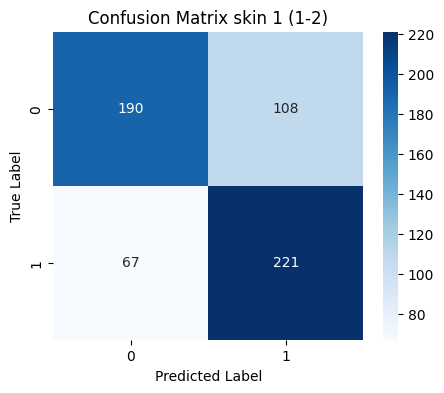

Accuracy: 0.7014
Sensitivity: 0.7674
Specificity: 0.6376
Precision: 0.6717
F1: 0.7164
AUC: 0.7025
40


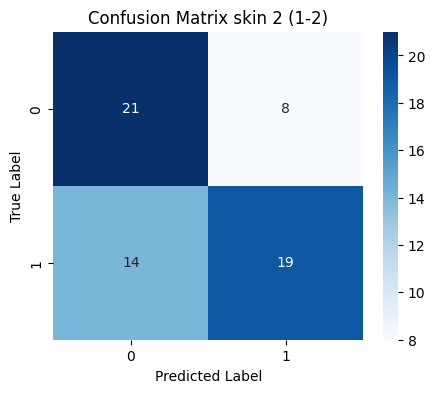

Accuracy: 0.6452
Sensitivity: 0.5758
Specificity: 0.7241
Precision: 0.7037
F1: 0.6333
AUC: 0.6499
['CNN  learning_rate = 0.001  weight_decay = 0.0001  scheduler = CosineAnnealingLR  max_stop_count = 5  grad_norm_clip = 1  ', ' 0.7014', ' 0.7674', ' 0.6376', ' 0.6717', ' 0.7164', ' 0.7025', ' 0.6452', ' 0.5758', ' 0.7241', ' 0.7037', ' 0.6333', ' 0.6499']
CNN DS
learning_rate = 0.001
weight_decay = 0.0001
scheduler = CosineAnnealingLR
max_stop_count = 5
grad_norm_clip = 1
389


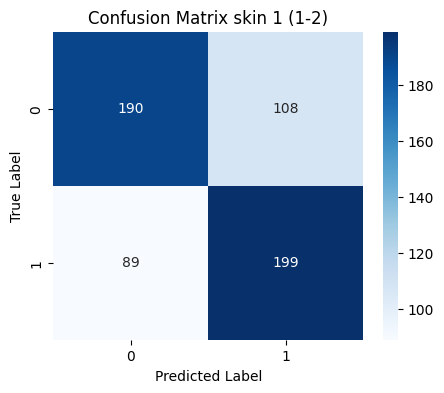

Accuracy: 0.6638
Sensitivity: 0.6910
Specificity: 0.6376
Precision: 0.6482
F1: 0.6689
AUC: 0.6643
38


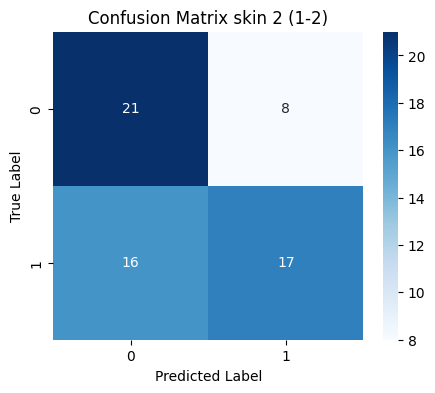

Accuracy: 0.6129
Sensitivity: 0.5152
Specificity: 0.7241
Precision: 0.6800
F1: 0.5862
AUC: 0.6196
['CNN DS  learning_rate = 0.001  weight_decay = 0.0001  scheduler = CosineAnnealingLR  max_stop_count = 5  grad_norm_clip = 1  ', ' 0.6638', ' 0.6910', ' 0.6376', ' 0.6482', ' 0.6689', ' 0.6643', ' 0.6129', ' 0.5152', ' 0.7241', ' 0.6800', ' 0.5862', ' 0.6196']
learning_rate = 0.001
weight_decay = 0.0001
scheduler = fixed
max_stop_count = 5
grad_norm_clip = 1
402


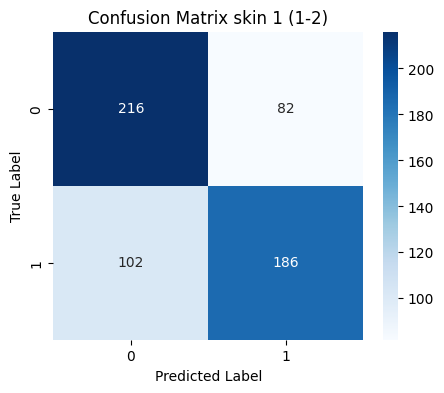

Accuracy: 0.6860
Sensitivity: 0.6458
Specificity: 0.7248
Precision: 0.6940
F1: 0.6691
AUC: 0.6853
41


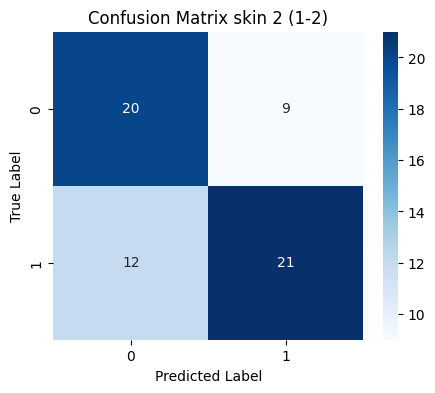

Accuracy: 0.6613
Sensitivity: 0.6364
Specificity: 0.6897
Precision: 0.7000
F1: 0.6667
AUC: 0.6630
['learning_rate = 0.001  weight_decay = 0.0001  scheduler = fixed  max_stop_count = 5  grad_norm_clip = 1  ', ' 0.6860', ' 0.6458', ' 0.7248', ' 0.6940', ' 0.6691', ' 0.6853', ' 0.6613', ' 0.6364', ' 0.6897', ' 0.7000', ' 0.6667', ' 0.6630']


In [21]:
for file_name in output_files:
    skin_tone = -1
    true_labels = None
    predicted_labels = None

    with open(file_name, "r") as file:
        content = file.read()

    sections = [
        section.strip() for section in content.split("Test output:") if section.strip()
    ]

    for section in sections:
        params = ""
        metrics = []
        for line in section.split("\n"):
            if any(keyword in line for keyword in hyper_params):
                print(line.strip())
                params += line.strip() + "\n"

            match_true = re.search(pattern_true, line)
            if match_true:
                skin_tone = int(match_true.group(1))
                true_labels = list(map(int, match_true.group(2).split(", ")))

            match_predicted = re.search(pattern_predict, line)
            if match_predicted:
                skin_tone = int(match_predicted.group(1))
                predicted_labels = list(map(int, match_predicted.group(2).split(", ")))

            match_loss = re.search(pattern_loss, line)
            if match_loss:
                loss_list = match_loss.group(1).split(", ")
                loss_values = list(map(float, loss_list))
                epochs = list(range(1, len(loss_values) + 1))

                # Plot loss curve
                plt.figure(figsize=(6, 4))
                plt.plot(epochs, loss_values, marker="o", linestyle="-", label="Loss")
                plt.xlabel("Epoch")
                plt.ylabel("Loss")
                plt.title("Model Loss per Epoch")
                plt.legend()
                plt.show()
                match_loss = None

            if true_labels and predicted_labels:
                print(np.sum(np.array(true_labels) == np.array(predicted_labels)))
                cm = confusion_matrix(true_labels, predicted_labels)
                plt.figure(figsize=(5, 4))
                sns.heatmap(
                    cm,
                    annot=True,
                    fmt="d",
                    cmap="Blues",
                    xticklabels=[0, 1],
                    yticklabels=[0, 1],
                )
                plt.xlabel("Predicted Label")
                plt.ylabel("True Label")
                if line.startswith("binary"):
                    plt.title(f"Confusion Matrix skin {skin_tone} (1-2)")
                else:
                    plt.title(f"Confusion Matrix skin  {skin_tone} (1-6)")
                plt.show()

                tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

                # Metrics calculation
                accuracy = accuracy_score(true_labels, predicted_labels)
                sensitivity = recall_score(
                    true_labels, predicted_labels
                )  # Same as recall
                specificity = tn / (tn + fp)  # True Negative Rate
                precision = precision_score(true_labels, predicted_labels)
                f1 = f1_score(true_labels, predicted_labels)
                auc = roc_auc_score(true_labels, predicted_labels)

                metric = ""
                # Print results
                # if line.startswith("binary"):
                #     metric += f"Skin {skin_tone} (1-2)\n"
                # else:
                #     metric += f"Skin {skin_tone} (1-6)\n"
                metric += f"Accuracy: {accuracy:.4f}\n"
                metric += f"Sensitivity: {sensitivity:.4f}\n"
                metric += f"Specificity: {specificity:.4f}\n"
                metric += f"Precision: {precision:.4f}\n"
                metric += f"F1: {f1:.4f}\n"
                metric += f"AUC: {auc:.4f}"
                print(metric)
                metrics.append(metric)
                true_labels = None
                predicted_labels = None

        params = params.replace("\n", "  ")
        metrics.insert(0, params)
        metrics = [line for metric in metrics for line in metric.split("\n")]
        metrics = [
            metric.split(":")[1] if ":" in metric else metric for metric in metrics
        ]
        print(metrics)
        with open(csv_file_name, "a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(metrics)

In [22]:
l1 = [
    1,
    1,
    1,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    1,
    1,
    0,
    1,
    1,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
]
l2 = [
    1,
    1,
    1,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    1,
    1,
    0,
    1,
    1,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    1,
    0,
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
]

In [23]:
for i in range(len(l1)):
    if l1[i] != l2[i]:
        print(i)
        print(l1[i])
        print(l2[i])

97
1
0
504
1
0
